In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from math import ceil

In [ ]:
#plt.style.use('Solarize_Light2')
#plt.style.use('dark_background')
#plt.style.use('classic')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')

In [6]:
def getInformation(data, country_id):
    print(country_id)
    suma = np.zeros(96)
    for i in country_id:
        country = data.loc[[i]]
        dummy = country.values[0][4:]
        suma = suma + dummy
    return suma[suma >= 1]

def calcFactor(x):
    suma = 0
    N = len(x)
    for i,p in enumerate(range(N-1)):
        suma +=  x[i+1]/x[i]
    
    F = suma / (N - 1)
    return N, F

def forecast(days, factor, start):
    xp = [start]
    for i in range(1, days):
        xp.append(xp[i-1] * factor)
    return xp

In [3]:
file = 'time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(file)
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
#covid = pd.read_csv(path + file)

In [ ]:
file = 'time_series_covid19_deaths_global.csv'
covid = pd.read_csv(file)
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
#covid = pd.read_csv(path + file)

In [ ]:
file = 'time_series_covid19_recovered_global.csv'
#path = '/home/luiggi/GitSites/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
covid = pd.read_csv(file)

In [ ]:
for i, p in enumerate(covid['Country/Region']):
    if p == 'Brazil':
        print(i,p)

In [ ]:
#covid.loc[[p for p in range(231,247)]]
covid.loc[[225]]

In [4]:
# Confirmed
row_bra = [28]
row_ecu = [97]
row_fra = [116]
row_ger = [120]
row_ita = [137]
row_mex = [158]
row_spa = [201]
row_uk = [223]
row_can = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 231, 238, 245, 246]
#row_can = [36] # Recovered
row_usa = [225]

country = {'bra':row_bra,
            #'ecu':row_ecu,
           'fra':row_fra, 
           'ger':row_ger, 
           'ita':row_ita, 
           'mex':row_mex, 
           'spa':row_spa, 
           'uk': row_uk, 
           #'can':row_can, 
           'usa':row_usa
          }
country_color = {'bra':'brown',
                #'ecu':'#7CCBA2',
                 'fra':'lightsteelblue', 
                 'ger':'peachpuff', 
                 'ita':'lightgreen', 
                 'mex':'grey', 
                 'spa':'mistyrose', 
                 'uk':'thistle', 
                 #'can':'orchid', 
                 'usa':'blue'
                }
for k in country:
    print(k, country[k], country_color[k])

bra [28] brown
fra [116] lightsteelblue
ger [120] peachpuff
ita [137] lightgreen
mex [158] grey
spa [201] mistyrose
uk [223] thistle
usa [225] blue


In [7]:
country_info = {}
for k in country:
    country_info[k] = getInformation(covid, country[k])
country_info

[28]
[116]
[120]
[137]
[158]
[201]
[223]
[225]


{'bra': array([1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 13.0, 13.0, 20.0,
        25.0, 31.0, 38.0, 52.0, 151.0, 151.0, 162.0, 200.0, 321.0, 372.0,
        621.0, 793.0, 1021.0, 1546.0, 1924.0, 2247.0, 2554.0, 2985.0,
        3417.0, 3904.0, 4256.0, 4579.0, 5717.0, 6836.0, 8044.0, 9056.0,
        10360.0, 11130.0, 12161.0, 14034.0, 16170.0, 18092.0, 19638.0,
        20727.0, 22192.0, 23430.0, 25262.0, 28320.0, 30425.0, 33682.0,
        36658.0, 38654.0, 40743.0, 43079.0, 45757.0, 50036.0, 54043.0,
        59324.0, 63100.0], dtype=object),
 'fra': array([2.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0,
        6.0, 6.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0,
        12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 18.0, 38.0,
        57.0, 100.0, 130.0, 191.0, 204.0, 285.0, 377.0, 653.0, 949.0,
        1126.0, 1209.0, 1784.0, 2281.0, 2281.0, 3661.0, 4469.0, 4499.0,
        6633.0, 7652.0, 9043.0, 10871.0, 12612.0, 14282.0, 16018.0,
        19856.0

In [8]:
# Mexico corrección - Confirmados
mex_list = list(country_info['mex'])
mex_list.append(15529)
print(mex_list)
country_info['mex'] = np.array(mex_list)
country_info['mex']

[1.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 12.0, 26.0, 41.0, 53.0, 82.0, 93.0, 118.0, 164.0, 203.0, 251.0, 316.0, 367.0, 405.0, 475.0, 585.0, 717.0, 848.0, 993.0, 1094.0, 1215.0, 1378.0, 1510.0, 1688.0, 1890.0, 2143.0, 2439.0, 2785.0, 3181.0, 3441.0, 3844.0, 4219.0, 4661.0, 5014.0, 5399.0, 5847.0, 6297.0, 6875.0, 7497.0, 8261.0, 8772.0, 9501.0, 10544.0, 11633.0, 12872.0, 13842.0, 14677.0, 15529]


array([1.0000e+00, 4.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
       5.0000e+00, 5.0000e+00, 6.0000e+00, 6.0000e+00, 7.0000e+00,
       7.0000e+00, 7.0000e+00, 8.0000e+00, 1.2000e+01, 2.6000e+01,
       4.1000e+01, 5.3000e+01, 8.2000e+01, 9.3000e+01, 1.1800e+02,
       1.6400e+02, 2.0300e+02, 2.5100e+02, 3.1600e+02, 3.6700e+02,
       4.0500e+02, 4.7500e+02, 5.8500e+02, 7.1700e+02, 8.4800e+02,
       9.9300e+02, 1.0940e+03, 1.2150e+03, 1.3780e+03, 1.5100e+03,
       1.6880e+03, 1.8900e+03, 2.1430e+03, 2.4390e+03, 2.7850e+03,
       3.1810e+03, 3.4410e+03, 3.8440e+03, 4.2190e+03, 4.6610e+03,
       5.0140e+03, 5.3990e+03, 5.8470e+03, 6.2970e+03, 6.8750e+03,
       7.4970e+03, 8.2610e+03, 8.7720e+03, 9.5010e+03, 1.0544e+04,
       1.1633e+04, 1.2872e+04, 1.3842e+04, 1.4677e+04, 1.5529e+04])

In [ ]:
# Mexico corrección - Defunciones
mex_list = list(country_info['mex'])#.append(848)
mex_list.append(712)
print(mex_list)
country_info['mex'] = np.array(mex_list)
country_info['mex']

In [9]:
thr = 1
days_forecast = 70

In [10]:
country_factor = {}
for k in country_info:
    country_factor[k] = calcFactor(country_info[k][country_info[k] >= thr])
#country_factor

In [11]:
country_forecast = {}
for k in country_factor:
    country_forecast[k] = forecast(days_forecast, country_factor[k][1], thr)
#country_forecast

In [12]:
total_days = 100
xts = np.arange(0,total_days,7)

mexi = country_info['mex'][country_info['mex'] >= thr]
mexi_max = ceil(np.max(mexi / 1000)) * 1000
mexi

array([1.0000e+00, 4.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
       5.0000e+00, 5.0000e+00, 6.0000e+00, 6.0000e+00, 7.0000e+00,
       7.0000e+00, 7.0000e+00, 8.0000e+00, 1.2000e+01, 2.6000e+01,
       4.1000e+01, 5.3000e+01, 8.2000e+01, 9.3000e+01, 1.1800e+02,
       1.6400e+02, 2.0300e+02, 2.5100e+02, 3.1600e+02, 3.6700e+02,
       4.0500e+02, 4.7500e+02, 5.8500e+02, 7.1700e+02, 8.4800e+02,
       9.9300e+02, 1.0940e+03, 1.2150e+03, 1.3780e+03, 1.5100e+03,
       1.6880e+03, 1.8900e+03, 2.1430e+03, 2.4390e+03, 2.7850e+03,
       3.1810e+03, 3.4410e+03, 3.8440e+03, 4.2190e+03, 4.6610e+03,
       5.0140e+03, 5.3990e+03, 5.8470e+03, 6.2970e+03, 6.8750e+03,
       7.4970e+03, 8.2610e+03, 8.7720e+03, 9.5010e+03, 1.0544e+04,
       1.1633e+04, 1.2872e+04, 1.3842e+04, 1.4677e+04, 1.5529e+04])

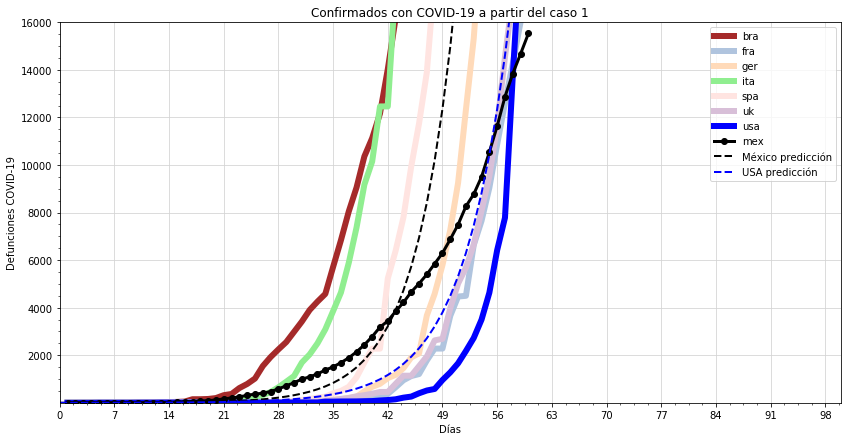

In [14]:

fig = plt.figure(figsize=(14,7))
for k in country_info:
#    print(k, sep='\t')
    pais = country_info[k][country_info[k] >= thr]
    xp = [x for x in range(1,len(pais)+1)]
    par = {'marker':'', 'lw':'-', 'lw':6.00, 'c':country_color[k], 'label':k}
    pars = {'marker':'o', 's':30.0, 'c':'k'}#country_color[k]}
    if k != 'mex':
        plt.scatter(xp[-2:], pais[-2:], **pars)
#        plt.scatter(xp, pais, **pars)
        plt.plot(xp, pais, **par)
#        plt.text(x = xp[-1], y = pais[-1], c = country_color[k], s = k, weight = 'bold')
    
xp = [x for x in range(1,len(mexi)+1)]
par = {'marker':'o', 'lw':'-', 'lw':3.00, 'c':'k', 'label':'mex'}
plt.plot(xp, mexi, **par)

plt.plot(country_forecast['mex'],'--', lw = 2.0, c = 'k', label = 'México predicción')
plt.plot(country_forecast['usa'],'--', lw = 2.0, c = 'b', label = 'USA predicción')
#plt.plot(country_forecast['ecu'],'--', lw = 2.0, c = 'gray', label = 'Ecuador predicción')

plt.xlim([1,total_days])#1 * len(Italy)])
plt.ylim([thr-0.1,mexi_max])
plt.xlabel('Días')
#plt.ylabel('Casos confirmados COVID-19')
plt.ylabel('Defunciones COVID-19')
#plt.yscale('log')
plt.xticks(ticks=xts, labels=xts)#, rotation='vertical')
plt.minorticks_on()
plt.legend()
plt.grid(color='#d4d4d4')
plt.title('Confirmados con COVID-19 a partir del caso 1')
#plt.title('Defunciones desde el primer registro ...')
#plt.savefig('Confirmados290320_02_.png')
#plt.savefig('Defunciones290320.png')
plt.show()